# Create Advanced Waterfall

In [4]:
#!pip install numpy
#!pip install matplotlib

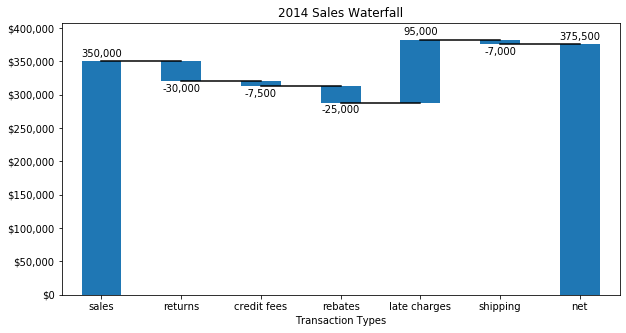

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Use python 2.7+ syntax to format currency
def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)
formatter = FuncFormatter(money)

#Data to plot. Do not include a total, it will be calculated
index = ['sales','returns','credit fees','rebates','late charges','shipping']
data = {'amount': [350000,-30000,-7500,-25000,95000,-7000]}

#Store data and create a blank series to use for the waterfall
trans = pd.DataFrame(data=data,index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)

#Get the net total number for the final element in the waterfall
total = trans.sum().amount
trans.loc["net"]= total
blank.loc["net"] = total

#The steps graphically show the levels as well as used for label placement
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

#When plotting the last element, we want to show the full bar,
#Set the blank to 0
blank.loc["net"] = 0

#Plot and label
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, figsize=(10, 5), title="2014 Sales Waterfall")
my_plot.plot(step.index, step.values,'k')
my_plot.set_xlabel("Transaction Types")

#Format the axis for dollars
my_plot.yaxis.set_major_formatter(formatter)

#Get the y-axis position for the labels
y_height = trans.amount.cumsum().shift(1).fillna(0)

#Get an offset so labels don't sit right on top of the bar
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

#Start label loop
loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
my_plot.set_ylim(0,blank.max()+int(plot_offset))
#Rotate the labels
my_plot.set_xticklabels(trans.index,rotation=0)
my_plot.get_figure().savefig("waterfall.png",dpi=200,bbox_inches='tight')